In [2]:
# upload file yang sudah diunduh
# file akan disimpan sesuai dengan nama file yang diunggah
from google.colab import files
file = files.upload()

Saving barudak.JPG to barudak.JPG
Saving aden.jpeg to aden.jpeg


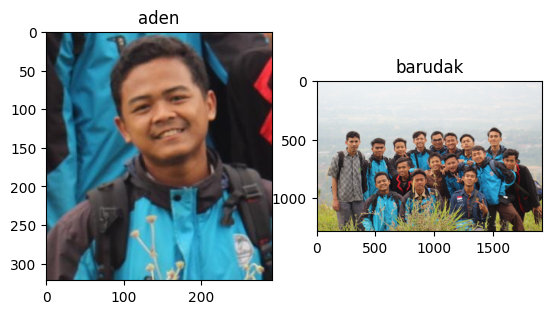

In [18]:
import cv2
from matplotlib import pyplot as plt

# Panggil dan konversi warna agar sesuai dengan Matplotlib
aden = cv2.imread('aden.jpeg')
aden = cv2.cvtColor(aden, cv2.COLOR_BGR2RGB)

# Panggil dan konversi warna agar sesuai dengan Matplotlib
barudak = cv2.imread('barudak.JPG')
barudak = cv2.cvtColor(barudak, cv2.COLOR_BGR2RGB)

plt.subplot(1, 2, 1), plt.imshow(aden), plt.title('aden')
plt.subplot(1, 2, 2), plt.imshow(barudak), plt.title('barudak')
plt.show()


hasil metode cv2.TM_CCOEFF : 


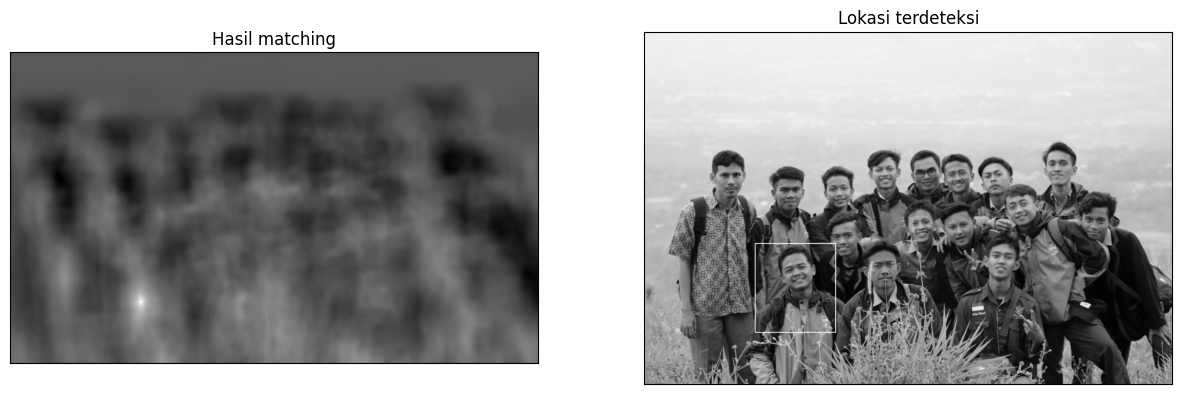

hasil metode cv2.TM_CCOEFF_NORMED : 


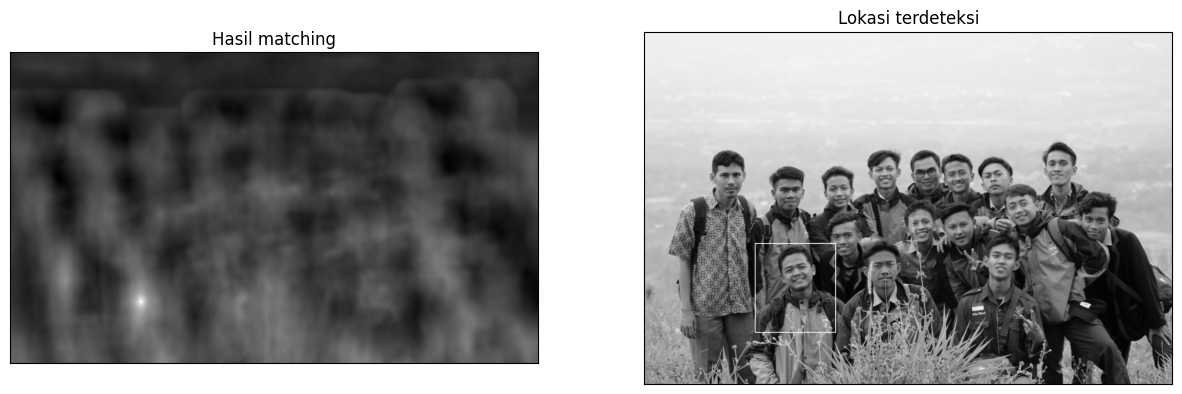

hasil metode cv2.TM_CCORR : 


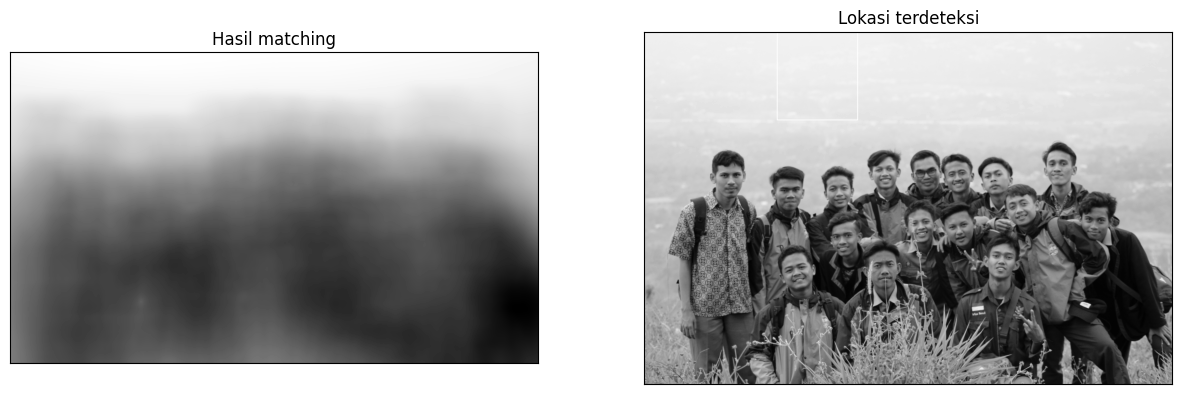

hasil metode cv2.TM_CCORR_NORMED : 


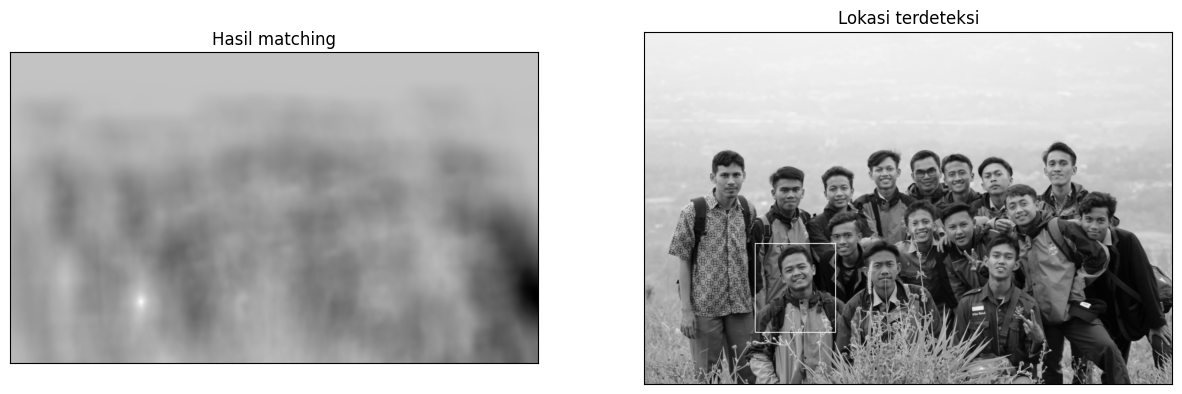

hasil metode cv2.TM_SQDIFF : 


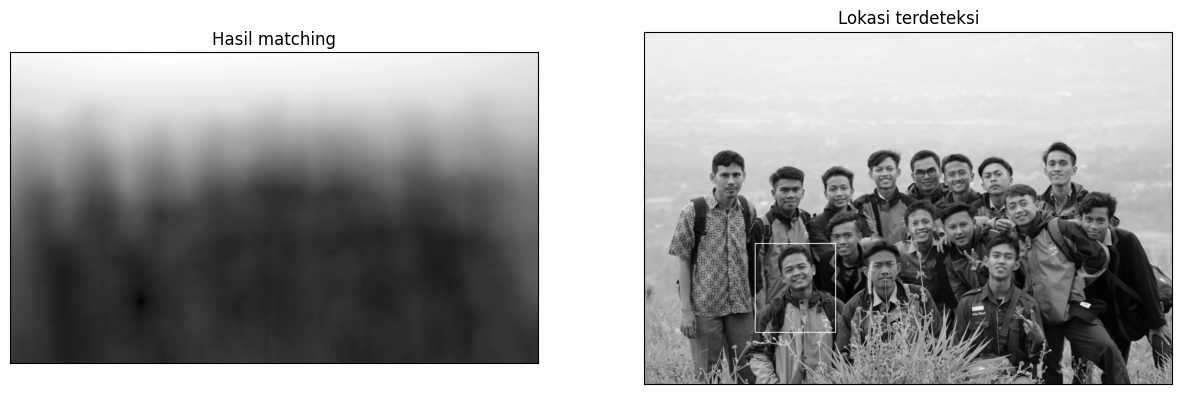

hasil metode cv2.TM_SQDIFF_NORMED : 


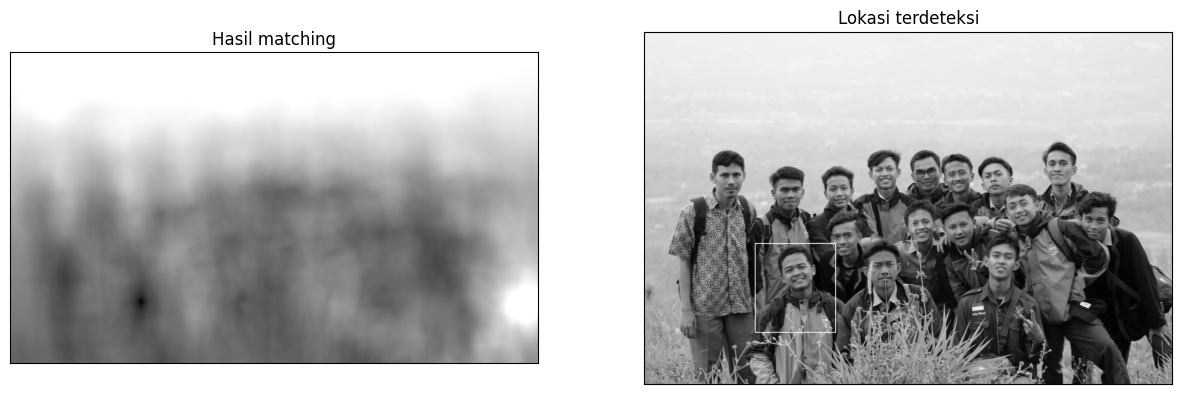

In [21]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('barudak.JPG',0)
img2 = img.copy()
template = cv2.imread('aden.jpeg',0)
w, h = template.shape[::-1]

# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

# perbesar ukuran hasil plotting
plt.rcParams["figure.figsize"] = (15,15)

for met in methods:
    img = img2.copy()
    method = eval(met)
    # menggunakan template matching
    res = cv2.matchTemplate(img,template,method)
    # mencari ukuran citra template untuk menggambar kotak
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    # metode TM_SQDIFF dan TM_SQDIFF_NORMED menggunakan persamaan yang sedikitberbeda
    # sehingga dibuatkan fungsi khusus untuk mengambil nilai minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
         top_left = min_loc
    else:
         top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    # buat persegi pada lokasi yang ditemukan
    cv2.rectangle(img, top_left, bottom_right, 255, 2) # 2 adalah ketebalan garis kotak
    print("hasil metode", met, ": " )
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Hasil matching'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')

    plt.title('Lokasi terdeteksi'), plt.xticks([]), plt.yticks([])

    plt.show()